In [ ]:
pip install websocket-client

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

zip_path = "/content/drive/MyDrive/Colab Notebooks/CSV-03-11.zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)


Files extracted to: /content/data


In [ ]:
import pandas as pd

In [ ]:
# df_mssql=pd.read_csv(r"/content/data/03-11/MSSQL.csv")
# df_netbios=pd.read_csv(r"/content/data/03-11/NetBIOS.csv")
# df_syn=pd.read_csv(r"/content/data/03-11/Syn.csv")
# df_udp=pd.read_csv(r"/content/data/03-11/UDP.csv")
# df_udplag=pd.read_csv(r"/content/data/03-11/UDPLAG.csv")
# df_portmap=pd.read_csv(r"/content/data/03-11/Portmap.csv")

In [ ]:
df_ldap=pd.read_csv(r"/content/data/03-11/LDAP.csv")


In [ ]:
df_ldap.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [ ]:
df_ldap[" Label"].value_counts()

,count
Label,
LDAP,1905191
NetBIOS,202919
BENIGN,5124


In [ ]:
df_ldap.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,13605,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,62631,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,48,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,143869,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,16171,172.16.0.5-192.168.50.4-872-54308-17,172.16.0.5,872,192.168.50.4,54308,17,2018-11-03 10:09:00.565993,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,80845,172.16.0.5-192.168.50.4-873-40653-17,172.16.0.5,873,192.168.50.4,40653,17,2018-11-03 10:09:00.565994,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [ ]:
final_cols = [
    ' Flow Duration',
    ' Total Fwd Packets', ' Total Backward Packets',
    ' Flow Bytes/s', ' Flow Packets/s',
    ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
    ' Min Packet Length', ' Max Packet Length',
    ' Flow IAT Mean', ' Flow IAT Std',
    ' Fwd IAT Mean', ' Bwd IAT Mean',
    ' SYN Flag Count', ' ACK Flag Count', ' FIN Flag Count', ' RST Flag Count',
    ' Down/Up Ratio',
    ' Average Packet Size',
    ' Active Mean', ' Idle Mean',
    ' Label'
]

In [ ]:
cols=[c for c in final_cols if c in df_ldap.columns]

In [ ]:
df_rem=df_ldap[cols]

In [ ]:
df_rem.columns = df_rem.columns.str.strip()

<Axes: xlabel='Label', ylabel='count'>

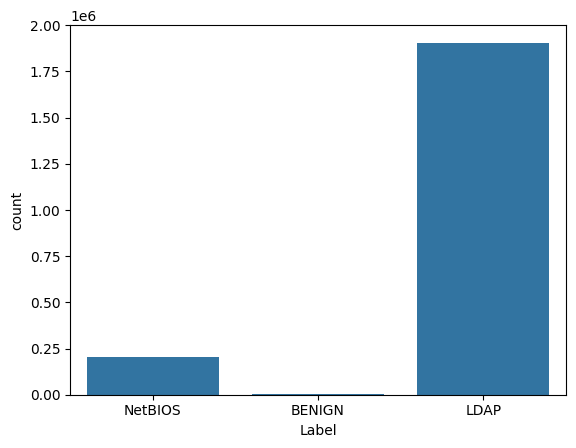

In [ ]:
sns.countplot(x="Label", data=df_rem)

<Axes: xlabel='Flow Duration'>

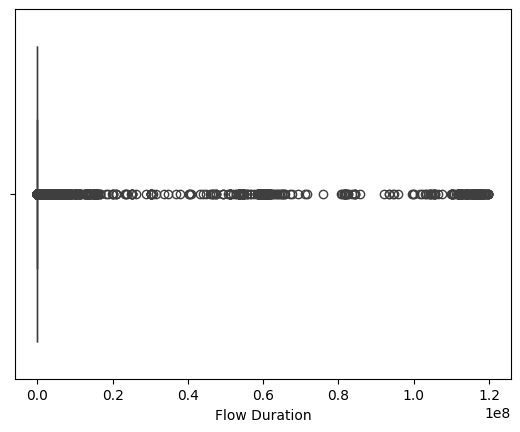

In [ ]:
sns.boxplot(x="Flow Duration", data=df_rem)

In [ ]:
df_rem.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Flow Packets/s', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'Min Packet Length', 'Max Packet Length',
       'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Bwd IAT Mean',
       'SYN Flag Count', 'ACK Flag Count', 'RST Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Label'],
      dtype='object')

In [ ]:
df_rem["Label"].value_counts()

,count
Label,
LDAP,1905191
NetBIOS,202919
BENIGN,5124


In [ ]:
for x in df_rem.columns:
  print(f"{x}:{df_rem[x].nunique()}")

Flow Duration:4481
Total Fwd Packets:175
Total Backward Packets:139
Flow Packets/s:4768
Packet Length Mean:1214
Packet Length Std:1016
Packet Length Variance:1020
Min Packet Length:153
Max Packet Length:528
Flow IAT Mean:4901
Flow IAT Std:5242
Fwd IAT Mean:3076
Bwd IAT Mean:1203
SYN Flag Count:2
ACK Flag Count:2
RST Flag Count:2
Down/Up Ratio:7
Average Packet Size:1230
Label:3


In [ ]:
possible_cat=["SYN Flag Count","ACK Flag Count","RST Flag Count","Down/Up Ratio"]

In [ ]:
df_rem["SYN Flag Count"].value_counts()

,count
SYN Flag Count,
0,2113175
1,59


In [ ]:
nums=[]
for x in df_rem.columns:
  if x not in possible_cat:
    nums.append(x)

In [ ]:
for a in possible_cat:
  print(f"{a}:{df_rem[a].value_counts()}")
  print("\n")

SYN Flag Count:SYN Flag Count
0    2113175
1         59
Name: count, dtype: int64


ACK Flag Count:ACK Flag Count
0    2112257
1        977
Name: count, dtype: int64


RST Flag Count:RST Flag Count
0    2112289
1        945
Name: count, dtype: int64


Down/Up Ratio:Down/Up Ratio
0.0    2110472
1.0       2032
2.0        478
3.0        169
4.0         67
5.0         14
8.0          2
Name: count, dtype: int64




In [ ]:
nums.remove("Label")

In [ ]:
possible_cat.remove("Down/Up Ratio")

In [ ]:
# def binaryencoder():
#   df_rem["Label"]=df_rem["Label"].apply(lambda x:1 if x=="BENIGN" else 0)
# df_rem["Label"]

In [ ]:
# preprocessor.fit_transform(df_rem)

In [ ]:
# import numpy as np

# print(np.isinf(df_rem).sum())
# # print(np.isnan(df_rem).sum())
# # df_rem.shape

In [ ]:
df_rem[df_rem["Flow Packets/s"]==np.inf]["Label"].value_counts()

,count
Label,
LDAP,42976
NetBIOS,11065
BENIGN,71


In [ ]:
df_rem[df_rem["Flow Packets/s"]!=np.inf]

,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Packets/s,Packet Length Mean,Packet Length Std,Packet Length Variance,Min Packet Length,Max Packet Length,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,Down/Up Ratio,Average Packet Size,Label
0,1,2,0,2.000000e+06,211.0,0.0,0.0,211.0,211.0,1.0,0.0,1.0,0.0,0,0,0,0.0,316.5,NetBIOS
1,48,2,0,4.166667e+04,265.0,0.0,0.0,265.0,265.0,48.0,0.0,48.0,0.0,0,0,0,0.0,397.5,NetBIOS
2,1,2,0,2.000000e+06,229.0,0.0,0.0,229.0,229.0,1.0,0.0,1.0,0.0,0,0,0,0.0,343.5,NetBIOS
3,1,2,0,2.000000e+06,229.0,0.0,0.0,229.0,229.0,1.0,0.0,1.0,0.0,0,0,0,0.0,343.5,NetBIOS
4,1,2,0,2.000000e+06,229.0,0.0,0.0,229.0,229.0,1.0,0.0,1.0,0.0,0,0,0,0.0,343.5,NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113229,2,2,0,1.000000e+06,1456.0,0.0,0.0,1456.0,1456.0,2.0,0.0,2.0,0.0,0,0,0,0.0,2184.0,LDAP
2113230,2,2,0,1.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,2.0,0.0,2.0,0.0,0,0,0,0.0,2208.0,LDAP
2113231,3,2,0,6.666667e+05,1472.0,0.0,0.0,1472.0,1472.0,3.0,0.0,3.0,0.0,0,0,0,0.0,2208.0,LDAP
2113232,2,2,0,1.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,2.0,0.0,2.0,0.0,0,0,0,0.0,2208.0,LDAP


In [ ]:
df_rem["Flow Packets/s"].describe()

,Flow Packets/s
count,2.113234e+06
mean,inf
std,NaN
min,5.272314e-02
25%,2.000000e+06
50%,2.000000e+06
75%,2.000000e+06
max,inf


In [ ]:
df_rem[df_rem["Flow Packets/s"]!=np.inf]["Flow Packets/s"].describe()

,Flow Packets/s
count,2.059122e+06
mean,1.775852e+06
std,5.115828e+05
min,5.272314e-02
25%,2.000000e+06
50%,2.000000e+06
75%,2.000000e+06
max,3.000000e+06


In [ ]:
max_val=df_rem[df_rem["Flow Packets/s"]!=np.inf]["Flow Packets/s"].max()

In [ ]:
df_rem["Flow Packets/s"]=df_rem['Flow Packets/s'].replace([np.inf],max_val*1.2)

In [ ]:
df_rem["Flow Packets/s"].max()

3600000.0

In [ ]:
df_rem["Label"].value_counts()

,count
Label,
LDAP,1905191
NetBIOS,202919
BENIGN,5124


In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ("num",StandardScaler(),nums),
    # ("label",binaryencoder(),df_rem["Label"]),
    ("onehot",OneHotEncoder(),["Down/Up Ratio"]),
    ("bin","passthrough",possible_cat)
])
df_rem["Label"]=df_rem["Label"].apply(lambda x : 1 if x=="BENIGN" else 0)

In [ ]:
# preprocessor.fit_transform(df_rem)

In [ ]:
log_pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("model",LogisticRegression(max_iter=1000, class_weight="balanced"))
])

In [ ]:
forest_pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("model",RandomForestClassifier(n_estimators=100,random_state=42))
])

In [ ]:
attack_df=df_rem[df_rem["Label"]==0]
benign_df=df_rem[df_rem["Label"]==1]

In [ ]:
benign_df.shape

(5124, 19)

In [ ]:
attack_sample=attack_df.sample(n=7000,random_state=42)

In [ ]:
combined=pd.concat([attack_sample["Label"],benign_df["Label"]],ignore_index=True)

<Axes: xlabel='Label', ylabel='count'>

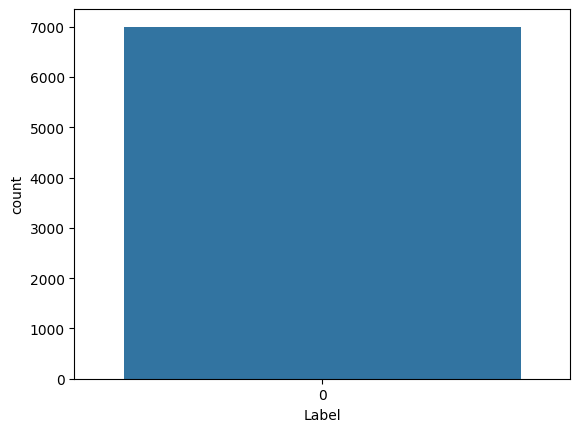

In [ ]:
sns.countplot(x="Label",data=attack_sample)

In [ ]:
attack_sample

,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Packets/s,Packet Length Mean,Packet Length Std,Packet Length Variance,Min Packet Length,Max Packet Length,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,Down/Up Ratio,Average Packet Size,Label
20374,49,2,0,4.081633e+04,229.0,0.0,0.0,229.0,229.0,49.0,0.0,49.0,0.0,0,0,0,0.0,343.5,0
459853,1,2,0,2.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,1.0,0.0,1.0,0.0,0,0,0,0.0,2208.0,0
101585,1,2,0,2.000000e+06,229.0,0.0,0.0,229.0,229.0,1.0,0.0,1.0,0.0,0,0,0,0.0,343.5,0
1656405,1,2,0,2.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,1.0,0.0,1.0,0.0,0,0,0,0.0,2208.0,0
1747246,1,2,0,2.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,1.0,0.0,1.0,0.0,0,0,0,0.0,2208.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371634,1,2,0,2.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,1.0,0.0,1.0,0.0,0,0,0,0.0,2208.0,0
913581,1,2,0,2.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,1.0,0.0,1.0,0.0,0,0,0,0.0,2208.0,0
863611,1,2,0,2.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,1.0,0.0,1.0,0.0,0,0,0,0.0,2208.0,0
1566810,1,2,0,2.000000e+06,1472.0,0.0,0.0,1472.0,1472.0,1.0,0.0,1.0,0.0,0,0,0,0.0,2208.0,0


In [ ]:
combined_df=pd.DataFrame(combined)

<Axes: xlabel='Label', ylabel='count'>

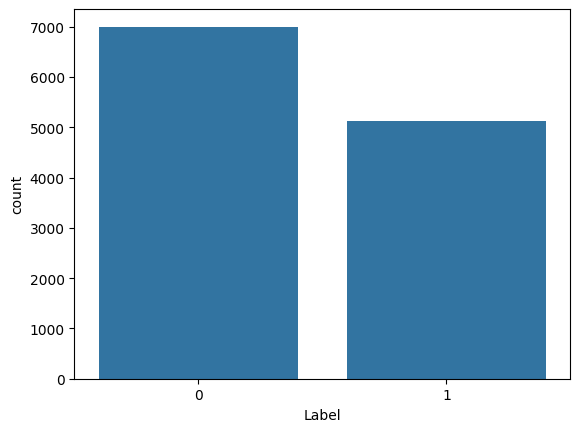

In [ ]:
sns.countplot(x="Label",data=combined_df)

In [ ]:
new_df=pd.concat([attack_sample,benign_df],axis=0)

In [ ]:
new_df=new_df.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
new_df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Packets/s,Packet Length Mean,Packet Length Std,Packet Length Variance,Min Packet Length,Max Packet Length,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,Down/Up Ratio,Average Packet Size,Label
0,1,2,0,2.000000e+06,229.0,0.000000,0.0,229.0,229.0,1.000000,0.000000,1.0,0.0,0,0,0,0.0,343.5,0
1,1,2,0,2.000000e+06,1472.0,0.000000,0.0,1472.0,1472.0,1.000000,0.000000,1.0,0.0,0,0,0,0.0,2208.0,0
2,1,2,0,2.000000e+06,1472.0,0.000000,0.0,1472.0,1472.0,1.000000,0.000000,1.0,0.0,0,0,0,0.0,2208.0,0
3,1,2,0,2.000000e+06,229.0,0.000000,0.0,229.0,229.0,1.000000,0.000000,1.0,0.0,0,0,0,0.0,343.5,0
4,1,2,0,2.000000e+06,1472.0,0.000000,0.0,1472.0,1472.0,1.000000,0.000000,1.0,0.0,0,0,0,0.0,2208.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,32545,2,2,1.229067e+02,0.0,0.000000,0.0,0.0,0.0,10848.333333,18747.445275,0.0,49.0,0,0,0,1.0,0.0,1
12120,1,2,0,2.000000e+06,1472.0,0.000000,0.0,1472.0,1472.0,1.000000,0.000000,1.0,0.0,0,0,0,0.0,2208.0,0
12121,1,2,0,2.000000e+06,1472.0,0.000000,0.0,1472.0,1472.0,1.000000,0.000000,1.0,0.0,0,0,0,0.0,2208.0,0
12122,1,2,0,2.000000e+06,1448.0,0.000000,0.0,1448.0,1448.0,1.000000,0.000000,1.0,0.0,0,0,0,0.0,2172.0,0


In [ ]:
new_df.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Flow Packets/s', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'Min Packet Length', 'Max Packet Length',
       'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Bwd IAT Mean',
       'SYN Flag Count', 'ACK Flag Count', 'RST Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Label'],
      dtype='object')

In [ ]:
X=new_df.drop("Label",axis=1)
y=new_df["Label"]

In [ ]:
new_df["Label"].value_counts()

,count
Label,
0,7000
1,5124


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
log_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Flow Duration',
                                                   'Total Fwd Packets',
                                                   'Total Backward Packets',
                                                   'Flow Packets/s',
                                                   'Packet Length Mean',
                                                   'Packet Length Std',
                                                   'Packet Length Variance',
                                                   'Min Packet Length',
                                                   'Max Packet Length',
                                                   'Flow IAT Mean',
                                                   'Flow IAT Std',
                                                   'Fwd IAT Mean',
                                                   'Bwd IAT Mean',
                                                   'Average Packet Size']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Down/Up Ratio']),
                                                 ('bin', 'passthrough',
                                                  ['SYN Flag Count',
                                                   'ACK Flag Count',
                                                   'RST Flag Count'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
y_log_pred=log_pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_log_pred)
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1400
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2425
   macro avg       1.00      1.00      1.00      2425
weighted avg       1.00      1.00      1.00      2425



In [ ]:
forest_pipeline.fit(X_train,y_train)
y_forest_pred=forest_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_forest_pred)
print(classification_report(y_test, y_forest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1400
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2425
   macro avg       1.00      1.00      1.00      2425
weighted avg       1.00      1.00      1.00      2425



In [ ]:
y_test.value_counts()

,count
Label,
0,1400
1,1025


In [ ]:
test_set=df_rem.sample(n=900,random_state=42).reset_index(drop=True)

In [ ]:
test_set["Label"].value_counts()

,count
Label,
0,898
1,2


In [ ]:

joblib.dump(forest_pipeline, "ddos_detector.pkl")


['ddos_detector.pkl']

## 2. To be passed are the attributes like we used to make(X-test in kaggle compitions) without label in this case pass all columns except that label

In [ ]:
zip_path = "/content/drive/MyDrive/Colab Notebooks/MachineLearningCSV.zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

Files extracted to: /content/data


In [ ]:
%%writefile simulate_realtime_from_csv.py
import time
import argparse
from pathlib import Path
import pandas as pd

REQUIRED_COLS = [
    "Flow Duration",
    "Total Fwd Packets",
    "Total Backward Packets",
    "Flow Packets/s",
    "Packet Length Mean",
    "Packet Length Std",
    "Packet Length Variance",
    "Min Packet Length",
    "Max Packet Length",
    "Flow IAT Mean",
    "Flow IAT Std",
    "Fwd IAT Mean",
    "Bwd IAT Mean",
    "SYN Flag Count",
    "ACK Flag Count",
    "RST Flag Count",
    "Down/Up Ratio",
    "Average Packet Size",
]

EXTRA_COLS = ["Timestamp", "Label", "Destination Port", "Protocol"]

def simulate_stream(source_csv: Path, out_dir: Path, rows_per_file: int = 200, interval_sec: float = 1.0, include_extra: bool = True):
    out_dir.mkdir(parents=True, exist_ok=True)
    df = pd.read_csv(source_csv)
    df.columns = [c.strip() for c in df.columns]

    keep = [c for c in REQUIRED_COLS if c in df.columns]
    if include_extra:
        keep += [c for c in EXTRA_COLS if c in df.columns]
    if not keep:
        raise SystemExit(
            "None of the expected CICFlowMeter columns were found after stripping header spaces.\n"
            f"Expected any of: {REQUIRED_COLS}\n"
            f"Got: {list(df.columns)[:25]}... (showing first 25)"
        )

    df = df[keep]
    n = len(df)
    batch_id = 0
    print(f"[START] Streaming {n} rows from {source_csv} into {out_dir} in chunks of {rows_per_file} every {interval_sec}s.")
    while batch_id * rows_per_file < n:
        start = batch_id * rows_per_file
        end = min((batch_id + 1) * rows_per_file, n)
        chunk = df.iloc[start:end].copy()
        out_path = out_dir / f"flows_batch_{batch_id:06d}.csv"
        chunk.to_csv(out_path, index=False)
        print(f"[BATCH] Wrote rows {start}:{end} -> {out_path.name}")
        batch_id += 1
        time.sleep(interval_sec)
    print("[DONE] All rows streamed.")

def main():
    ap = argparse.ArgumentParser(description="Simulate real-time flow feature stream from an existing CIC CSV.")
    ap.add_argument("--source", required=True, help="Path to source CSV (e.g., CICIDS2017 flow file)")
    ap.add_argument("--out", required=True, help="Directory to write chunked CSVs (your pipeline can watch this)")
    ap.add_argument("--rows-per-file", type=int, default=200, help="Rows per emitted CSV file (default: 200)")
    ap.add_argument("--interval", type=float, default=1.0, help="Seconds between chunks (default: 1.0)")
    ap.add_argument("--no-extra", action="store_true", help="Exclude extra columns like Label/Timestamp if present")
    args = ap.parse_args()

    simulate_stream(
        Path(args.source),
        Path(args.out),
        rows_per_file=args.rows_per_file,
        interval_sec=args.interval,
        include_extra=(not args.no_extra),
    )

if __name__ == "__main__":
    main()


Overwriting simulate_realtime_from_csv.py


In [ ]:
df1=pd.read_csv(r"/content/data/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")

In [ ]:
df1.columns = df1.columns.str.strip()

In [ ]:
# !python simulate_realtime_from_csv.py \
#   --source "/content/data/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv" \
#   --out "/content/incoming" \
#   --rows-per-file 1 \
#   --interval 0.5
